# P3 - Open Food Facts - Exploration

## Import

In [28]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('seaborn')

C:\Users\cosic\AppData\Local\Temp\ipykernel_18140\2534110703.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv('../Source/openfoodfacts_clean.csv', sep='\t', low_memory=False)

In [3]:
data.describe(include='all')

,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
count,7957,7938,7957,7957,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000,7957.000000
unique,6876,2589,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Lait demi-écrémé,U,B,a renseigner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,25,237,4093,2934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,54.937287,1.468282,0.755978,7.684664,6.319379,0.555227,2.333962,1.255249,0.494194,4.308282
std,NaN,NaN,NaN,NaN,28.197701,1.651336,1.612437,4.764374,5.801604,0.901055,3.680309,7.635214,3.006010,4.926340
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,34.894837,0.060000,0.000000,4.430000,1.700000,0.000000,0.200000,0.012700,0.005000,1.000000
50%,NaN,NaN,NaN,NaN,52.103250,0.900000,0.200000,7.006000,5.000000,0.140000,1.100000,0.120000,0.047244,2.000000
75%,NaN,NaN,NaN,NaN,80.305927,2.560000,1.000000,11.370000,10.500000,0.900000,3.200000,0.762000,0.300000,6.000000


In [4]:
data.dtypes

product_name                object
brands                      object
nutrition_grade_fr          object
pnns_groups_1               object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
nutrition_score_fr_100g    float64
dtype: object

# Analyse Univaries

## Repartition des produits par categories

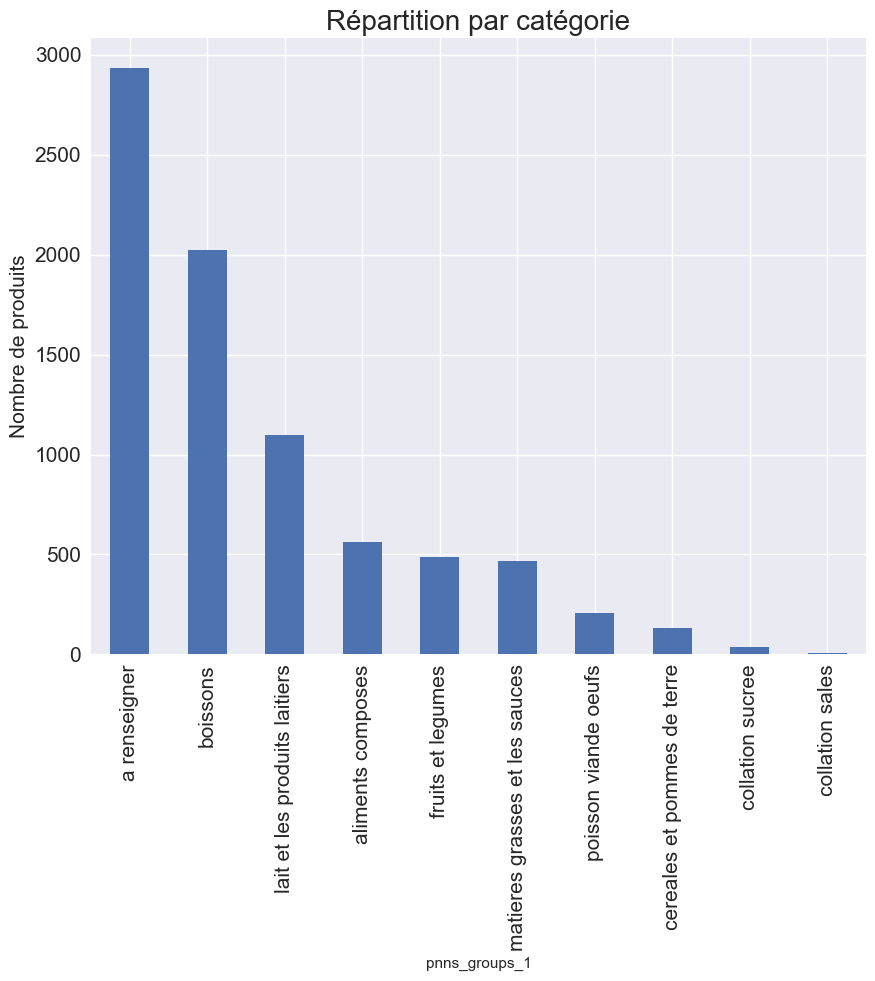

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

data['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

In [6]:
cat_a_renseigner = len(data[data['pnns_groups_1'] == 'a renseigner'])
cat_null = len(data[data['pnns_groups_1'].isnull()])
print(f"{(cat_a_renseigner + cat_null) / data.shape[0] * 100:.0f}% des produits sont sans catégories.")

37% des produits sont sans catégories.


## Repartition des marques

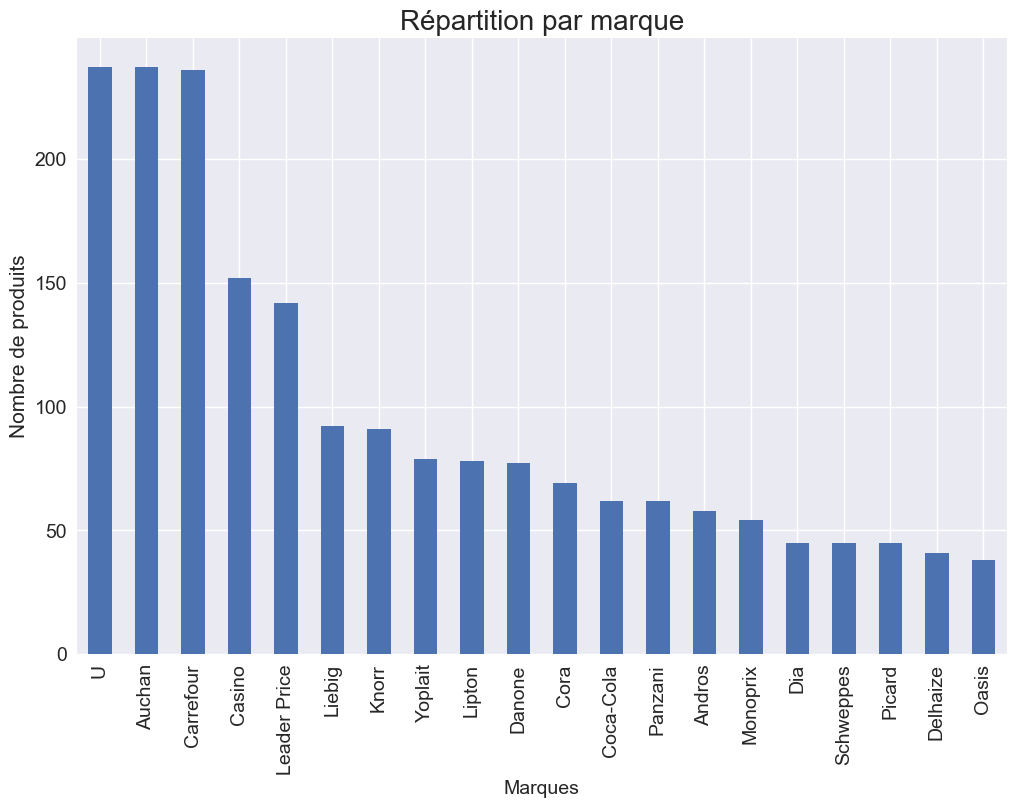

In [7]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
data['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

#### On remarque que les grandes distributions sont dans le top mais on remarque egalement des marques de produit

## Repartition des notes des produits

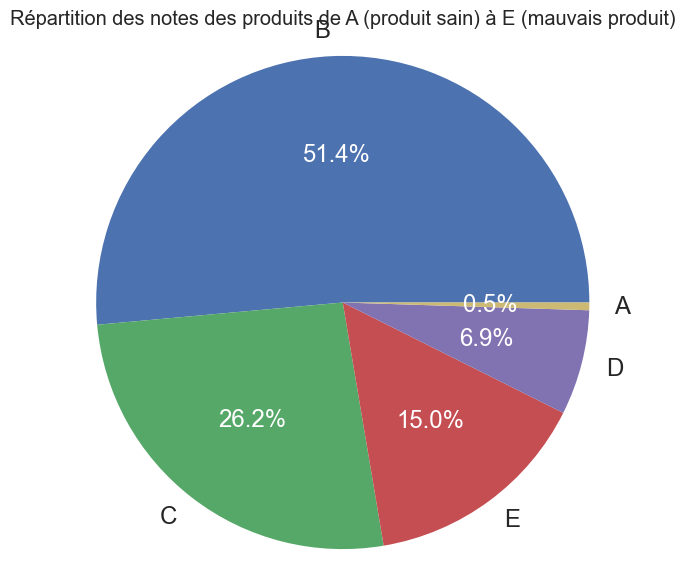

In [8]:
grades = data['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, autotexts = ax.pie(grades.values, labels=grades.index, autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size('xx-large')
for t in autotexts: 
    t.set_size('xx-large')
    t.set_color('w')
ax.set_title('Répartition des notes des produits de A (produit sain) à E (mauvais produit)', size='x-large')
ax.axis('equal')

plt.show()

#### On remarque que plus de la moitie des produits sont classe dans la Cat B

## Rapport des valeurs energetiques

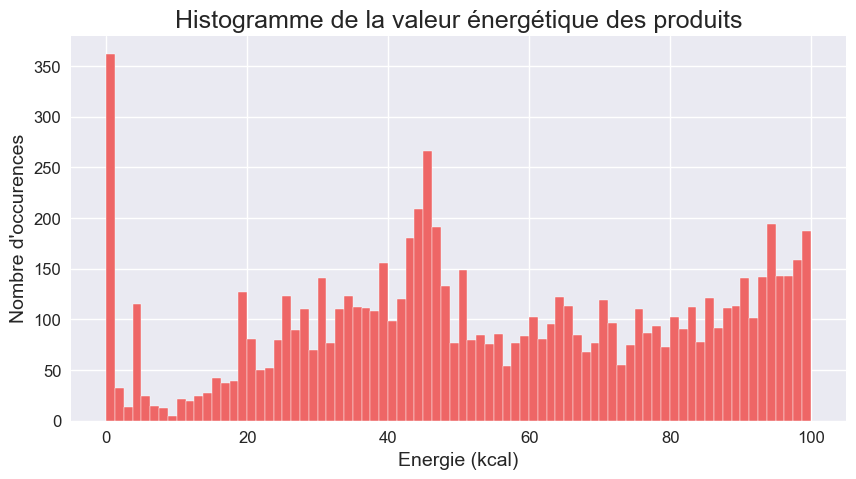

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['energy_100g'], bins=80, histtype='bar', color='#EE6666', edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size=18)
ax.set_xlabel("Energie (kcal)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

In [10]:
data.nlargest(10, 'energy_100g')

,product_name,brands,nutrition_grade_fr,pnns_groups_1,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
14,préparation à base de lait de coco,Thai Agri Foods Co. Ltd.,C,a renseigner,99.904398,10.00,8.33,3.330,3.33,0.0,0.0,0.08382,0.033000,9.0
53,Beurre D'arachide (croquant),Compliments,C,a renseigner,99.904398,6.65,8.00,6.463,3.00,1.0,3.0,0.00450,0.001772,6.0
59,Thon Pâle (émietté Dans L'eau),Clover leaf,B,a renseigner,99.904398,0.80,0.32,0.000,0.00,0.0,24.0,0.96012,0.378000,0.0
60,Thon pâle en morceau,Clover leaf,D,a renseigner,99.904398,1.31,0.20,1.800,0.00,0.0,20.0,3.20000,1.259843,11.0
61,Nutella,Ferrero,D,a renseigner,99.904398,2.19,2.00,15.310,11.00,1.0,1.0,10.00000,3.937008,13.0
63,Sauce à Lasagne,Gattuso,D,a renseigner,99.904398,4.50,2.00,11.000,8.00,1.0,4.0,4.50000,1.771654,12.0
70,"Mayo, Vraie Mayonnaise",Kraft,B,a renseigner,99.904398,4.45,1.50,11.523,0.00,0.0,0.1,0.07000,0.027559,2.0
96,Compote Rhubarbe,Bonne Maman,C,a renseigner,99.904398,0.27,0.00,21.850,20.00,0.0,0.0,0.00000,0.000000,5.0
174,Gäddsas,Ikea,C,matieres grasses et les sauces,99.904398,6.87,6.00,7.153,1.50,0.0,0.9,0.83000,0.326772,9.0
228,Jambon cuit sans couenne,"Dulano,Gebirgsjäger",C,poisson viande oeufs,99.904398,2.00,0.80,1.000,0.90,0.5,19.0,2.28600,0.900000,5.0


#### Top 10 des aproduits les plus calorifiques

## Distribution des variables numeriques

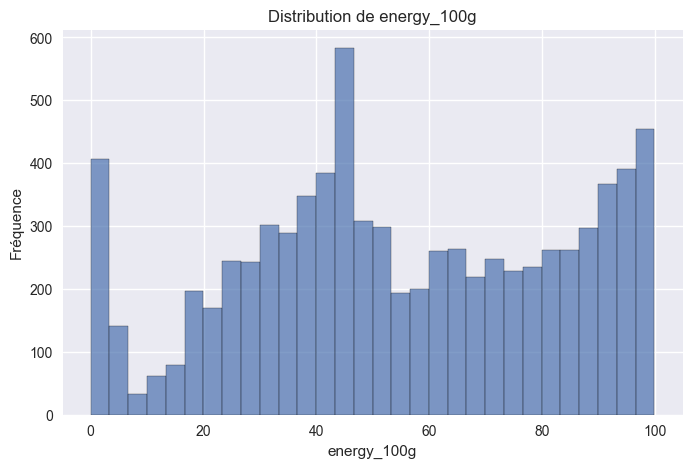

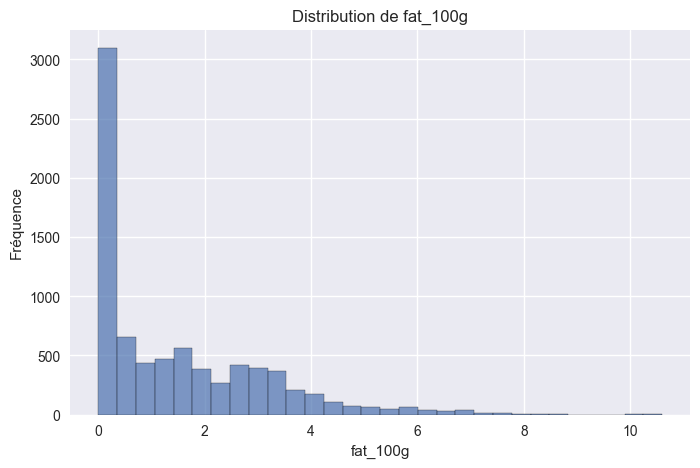

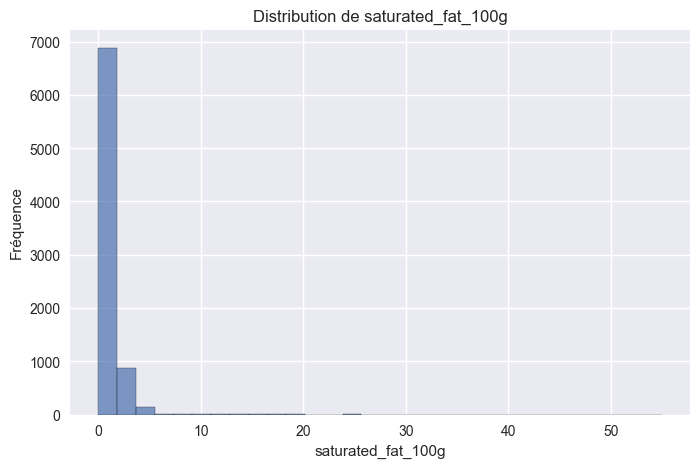

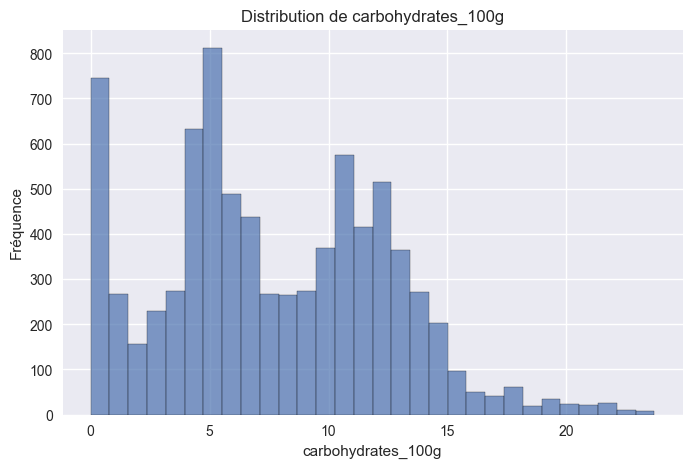

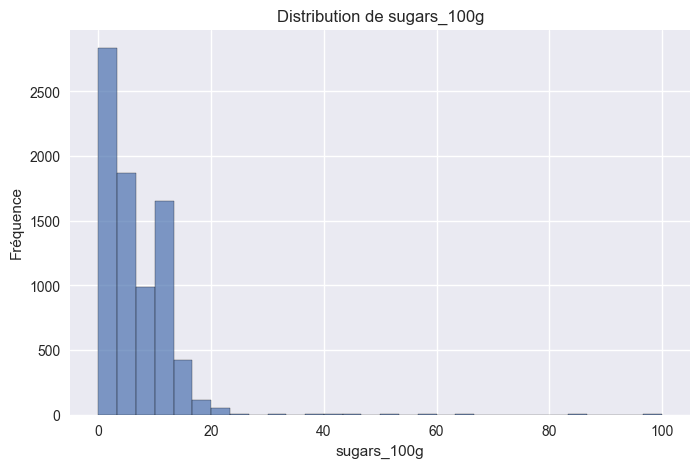

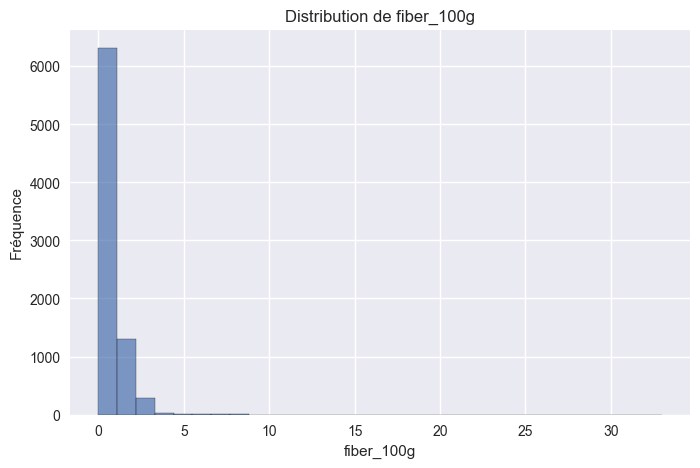

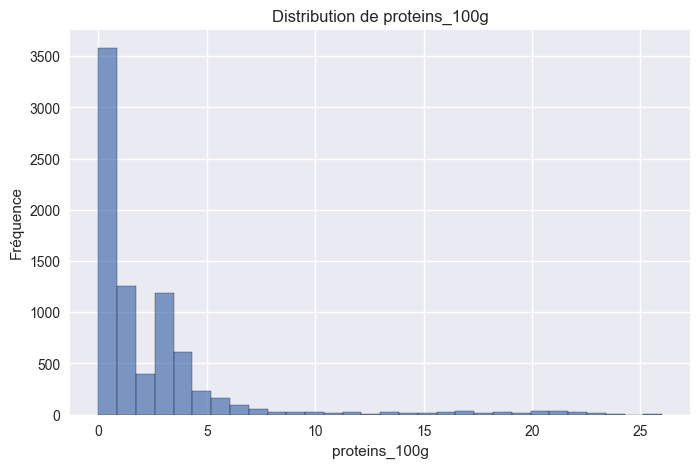

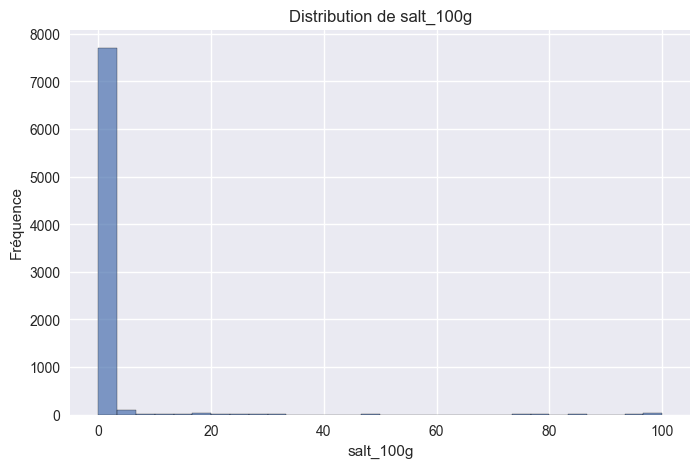

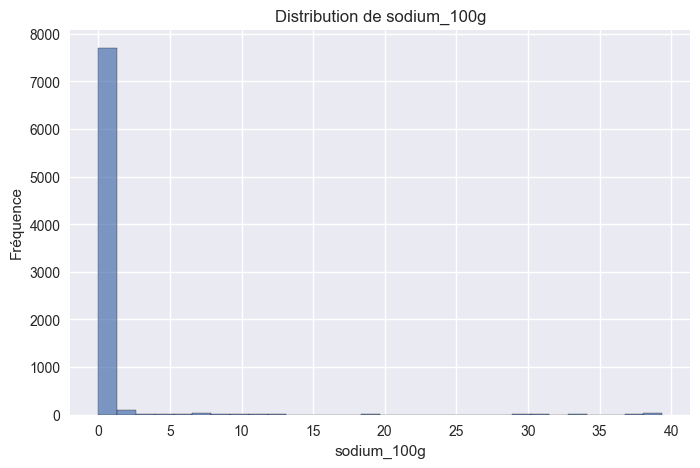

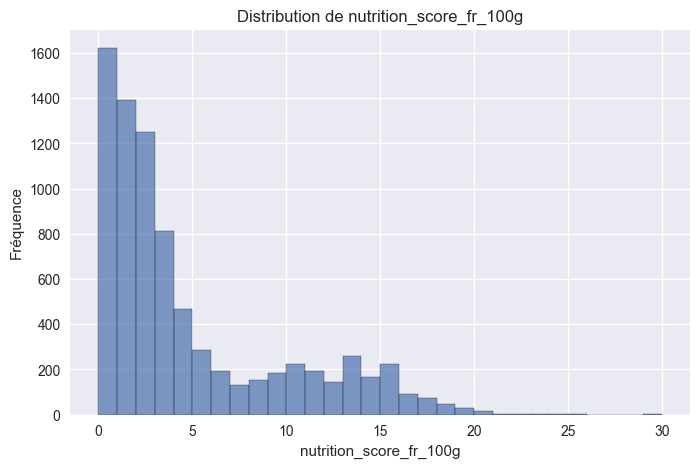

In [11]:
# Sélection des colonnes numériques pour l'analyse univariée
numeric_columns = [
    "energy_100g", "fat_100g", "saturated_fat_100g",
    "carbohydrates_100g", "sugars_100g", "fiber_100g",
    "proteins_100g", "salt_100g", "sodium_100g", "nutrition_score_fr_100g"
]

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col].dropna(), bins=30, edgecolor="k", alpha=0.7)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(True)
    plt.show()

#### La majorité des produits contiennent peu de lipides. La distribution est très excentrée vers la gauche. Constat similaire sur les graisses saturees.
#### Pour les carbonhydrates la distribution est légèrement bi-modale. La majorité des produits contiennent peu de glucides. Concernant le sugars on retrouve une distribution similaire aux graisses saturees.
#### Pour les proteines nous avons une distribution tres excentrees vers la gauche encore une fois. La majorite des produits possedent moins de 10% de proteines.
#### Concernant les fibres, excentre vers la gauche, de 0 a 5g pour la pluspart des produits.
#### COncernant le Salt et le Sodium qui conceptuellement sont similaire, on retrouve une concentration vers la gauche elevee, proche de 0.
#### On retrouve plusieurs pics, plus ou moins concentres, 2, 10, 15.

## Analyse Bivariee

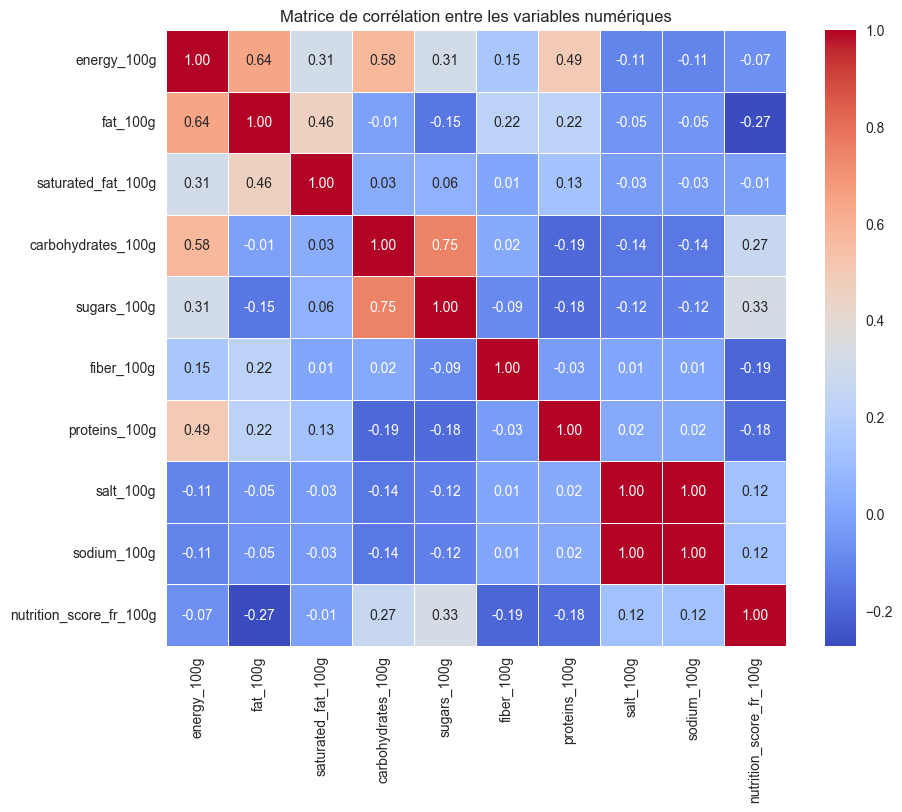

In [12]:
# Création d'une matrice de corrélation pour les colonnes numériques
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar=True
)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

#### Ajouter commentaire d'analyse

## identification des variables correlees

In [13]:
# Tri des variables les plus corrélées avec la cible `nutrition_score_fr_100g`
target = "nutrition_score_fr_100g"
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

# Variables les plus corrélées (positives et négatives)
top_positive_correlations = correlations_with_target[1:4]  # Top 3 positives
top_negative_correlations = correlations_with_target[-3:]  # Top 3 négatives

top_positive_correlations, top_negative_correlations

(sugars_100g           0.327180
 carbohydrates_100g    0.265514
 sodium_100g           0.120907
 Name: nutrition_score_fr_100g, dtype: float64,
 proteins_100g   -0.176243
 fiber_100g      -0.194805
 fat_100g        -0.272791
 Name: nutrition_score_fr_100g, dtype: float64)

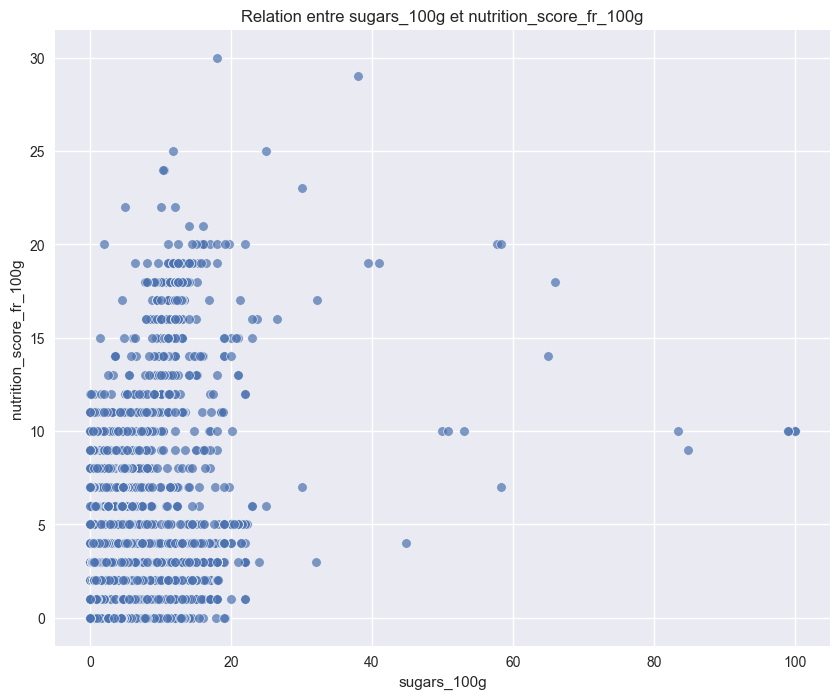

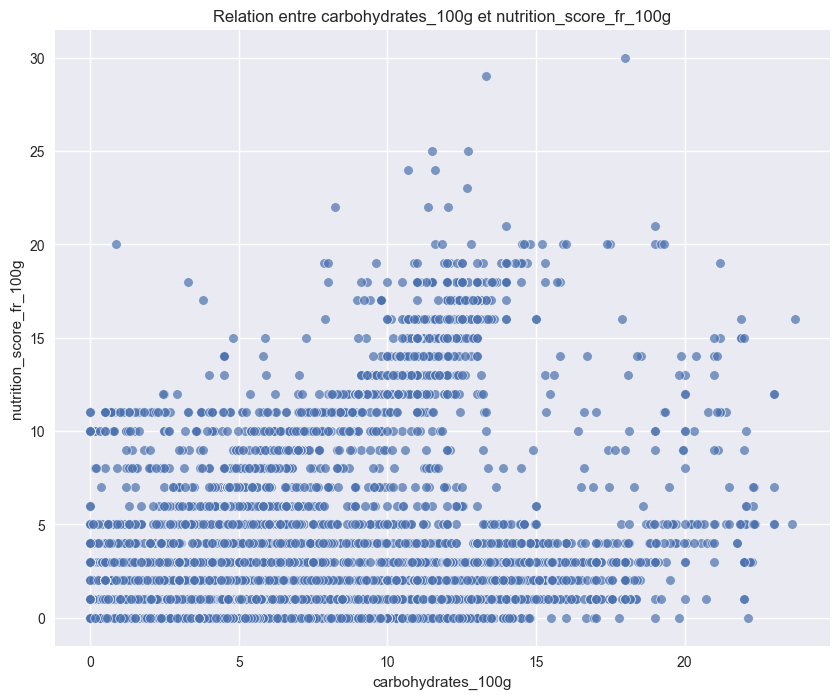

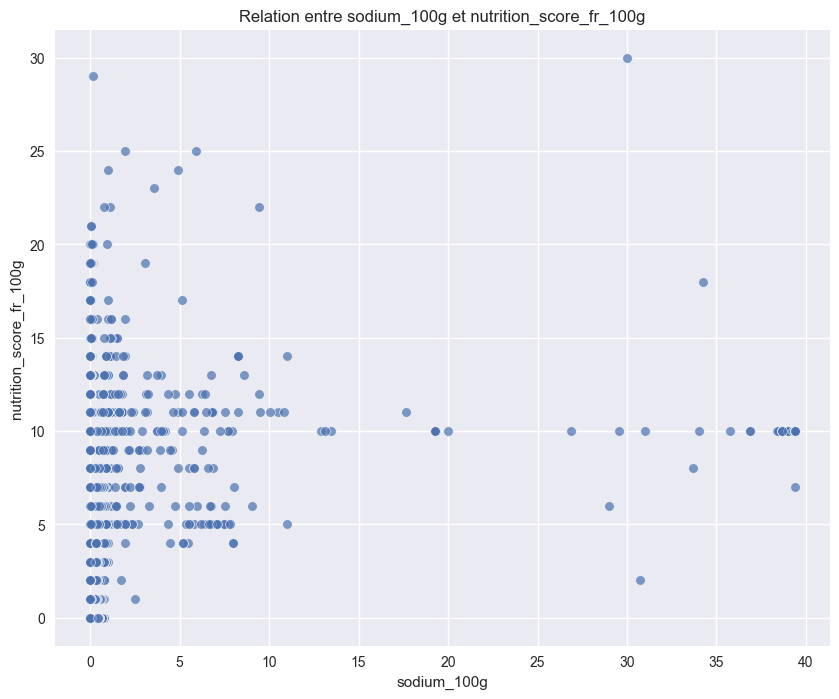

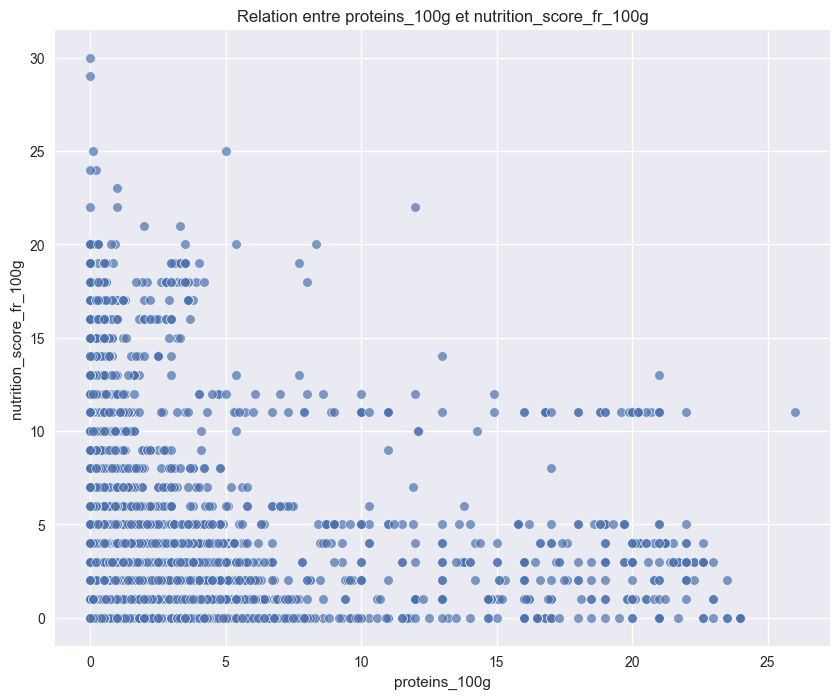

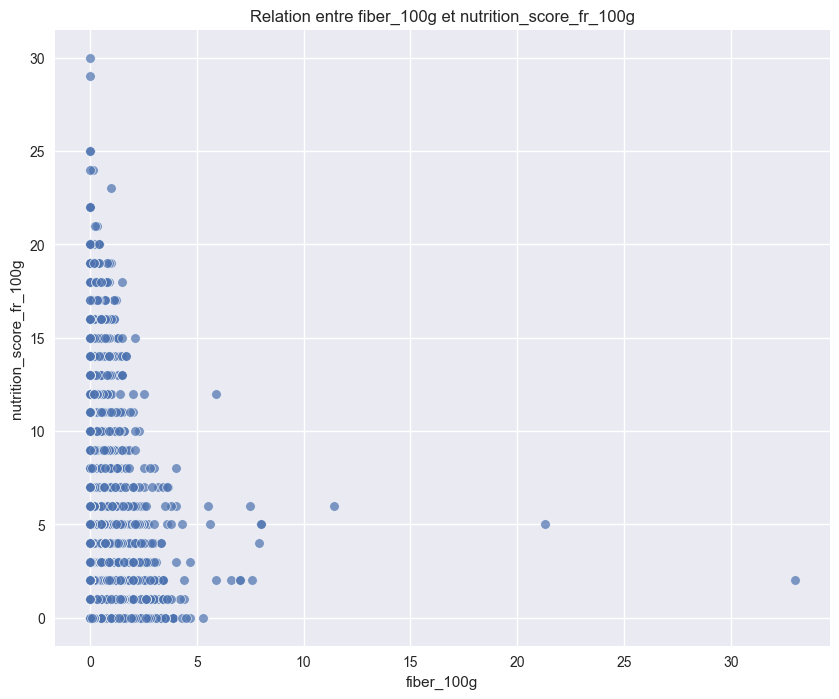

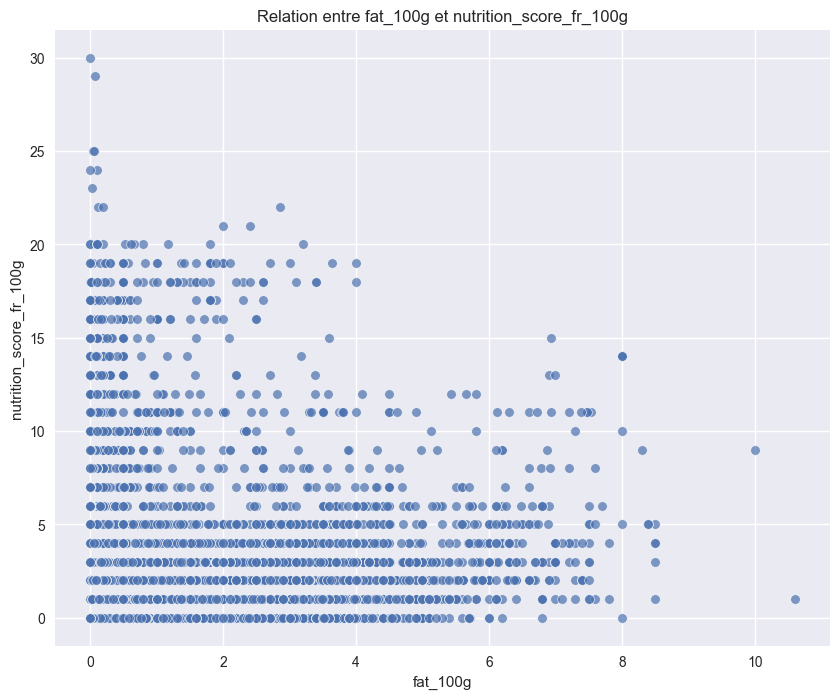

In [17]:
# Scatter plots pour les relations significatives avec la cible
significant_columns = list(top_positive_correlations.index) + list(top_negative_correlations.index)

for col in significant_columns:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[col], y=data[target], alpha=0.7)
    plt.title(f"Relation entre {col} et {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

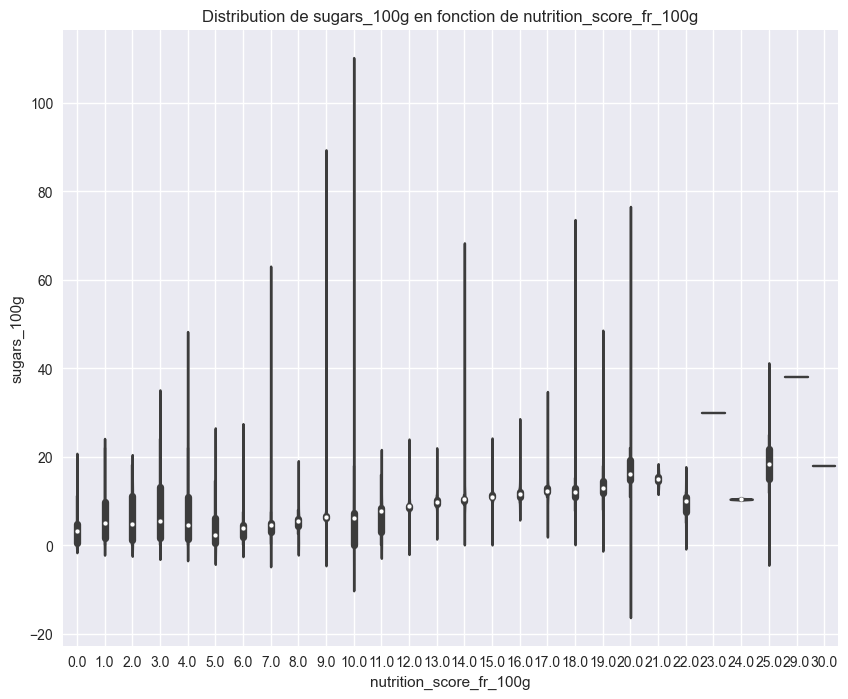

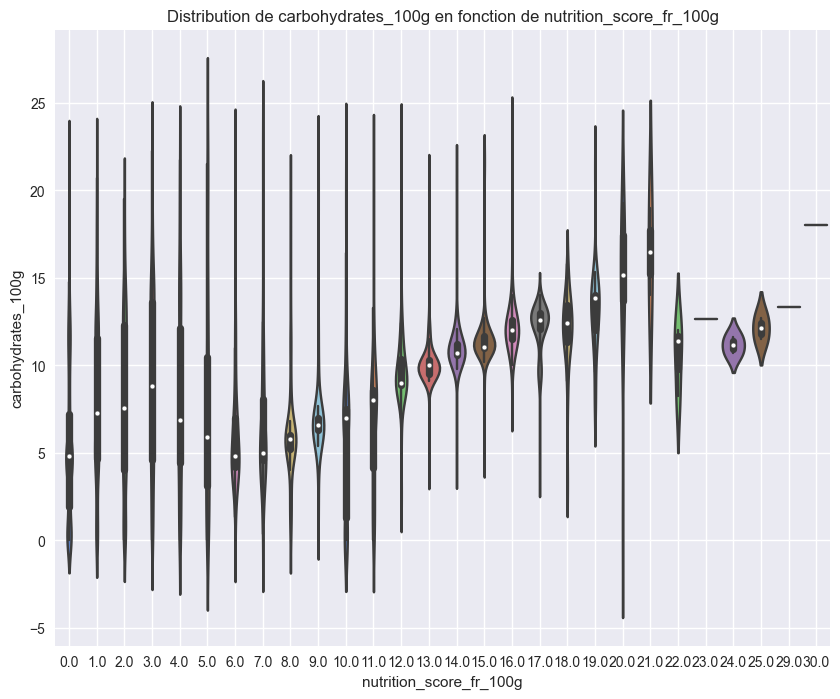

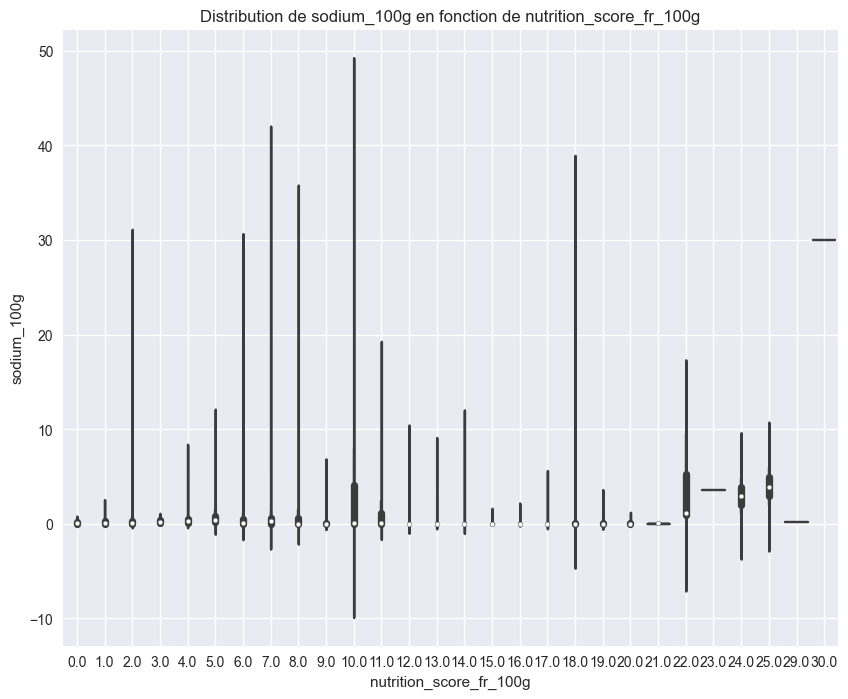

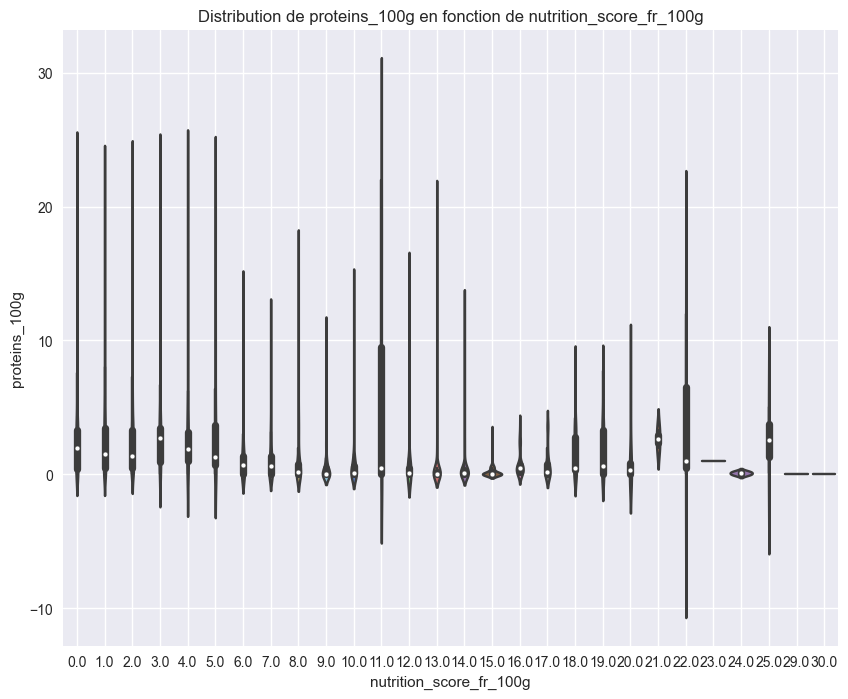

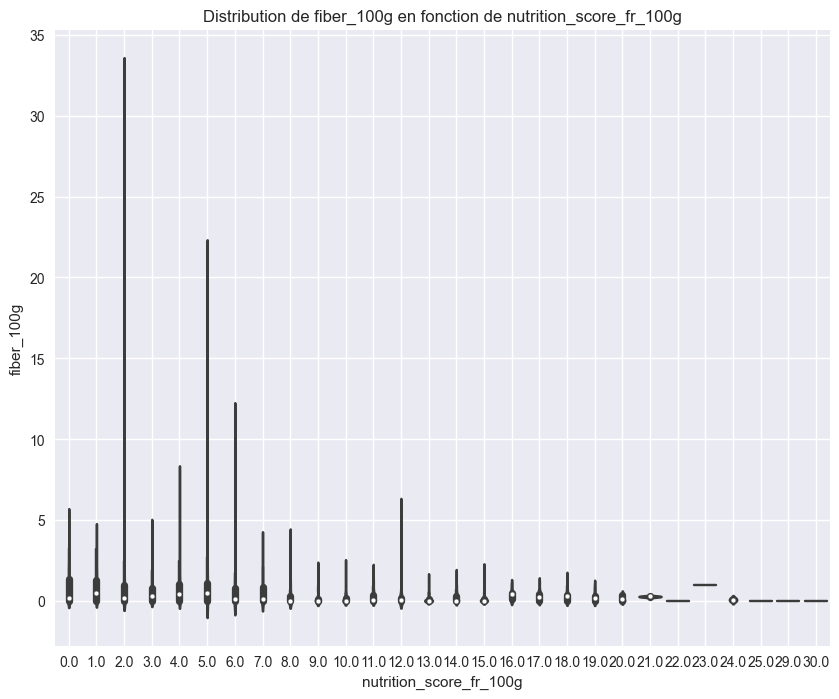

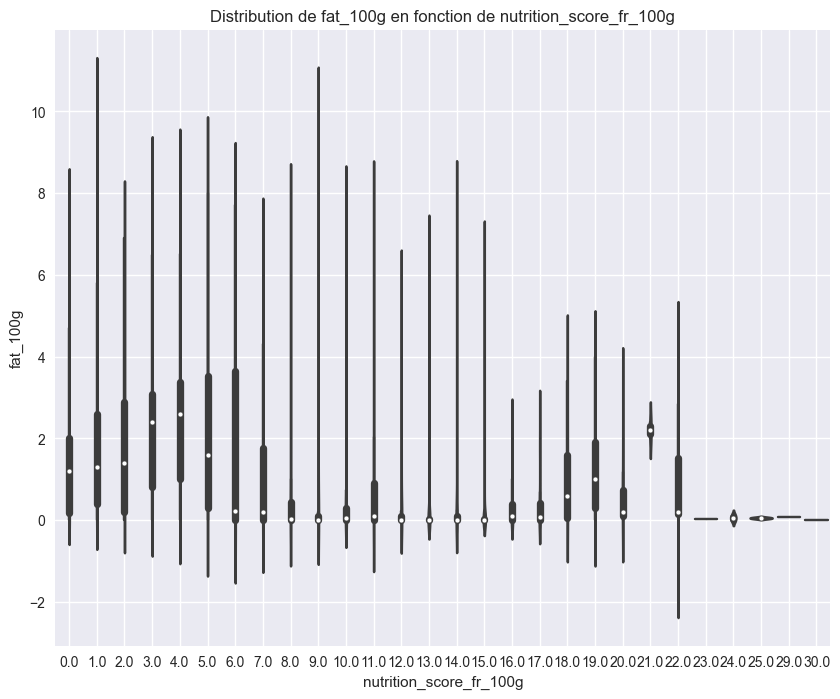

In [16]:
# Diagrammes de violon pour analyser les distributions des variables corrélées
for col in significant_columns:
    plt.figure(figsize=(10, 8))
    sns.violinplot(x=data[target], y=data[col], inner="box", palette="muted")
    plt.title(f"Distribution de {col} en fonction de {target}")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

#### Ajouter des commentaire d'analyse

## Analyse Multi variees

### ACP

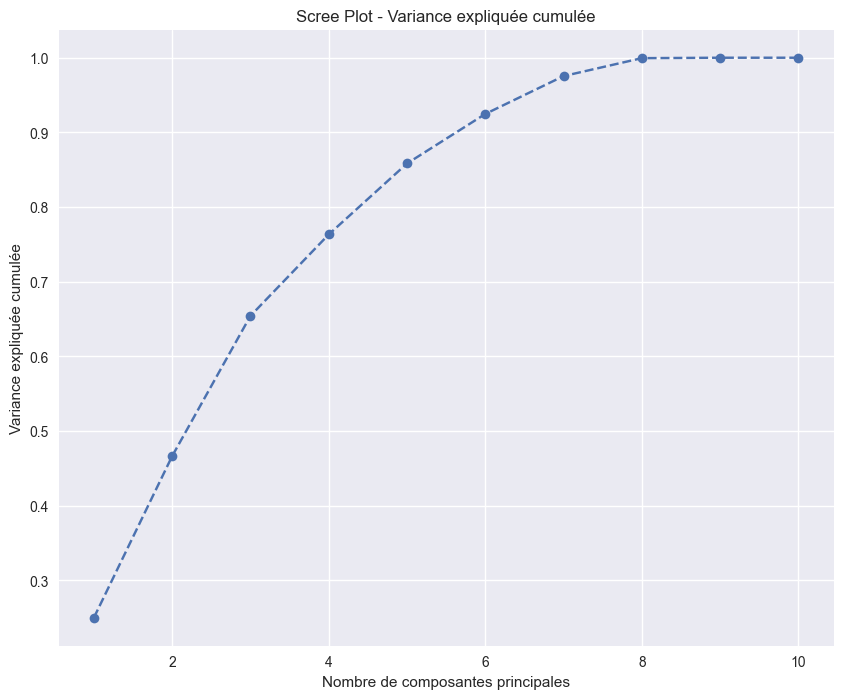

Nopmbre de composante pour expliquer au moins 90% de la variance : 6


In [20]:
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numeric_columns].dropna())

# Application de l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_normalized)

# Variance expliquée par composante
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title("Scree Plot - Variance expliquée cumulée")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.grid(True)
plt.show()

# Nombre optimal de composantes pour expliquer au moins 90% de la variance
optimal_components = (explained_variance_ratio.cumsum() >= 0.90).argmax() + 1
print(f"Nopmbre de composante pour expliquer au moins 90% de la variance : {optimal_components}")


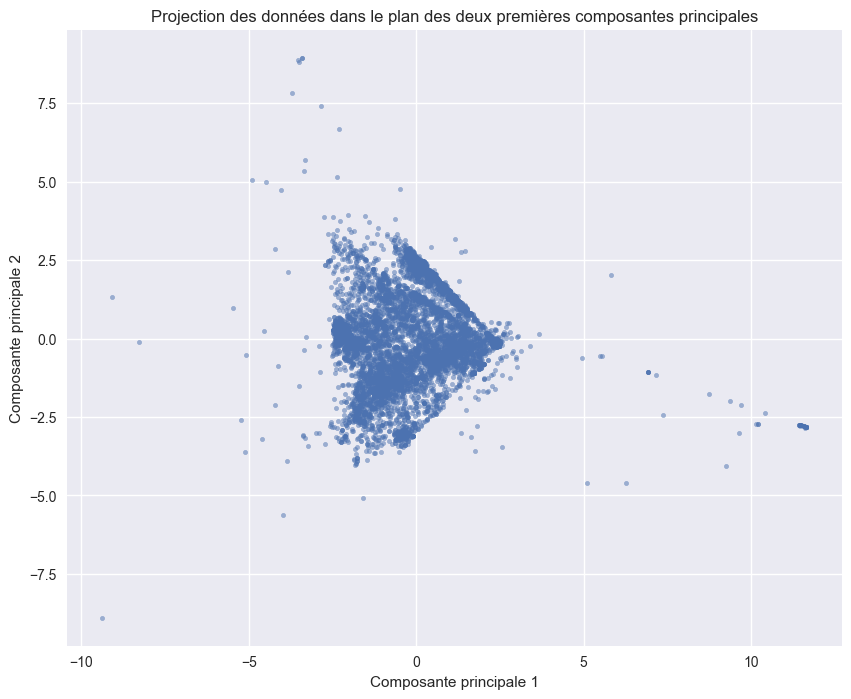

In [21]:
# Réduction des données à 6 composantes principales
pca_reduced = PCA(n_components=6)
pca_result_reduced = pca_reduced.fit_transform(data_normalized)

# Projection dans le plan des deux premières composantes
plt.figure(figsize=(10, 8))
plt.scatter(pca_result_reduced[:, 0], pca_result_reduced[:, 1], alpha=0.5, s=10)
plt.title("Projection des données dans le plan des deux premières composantes principales")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


### Cercle des correlations composantes principale 1 et 2

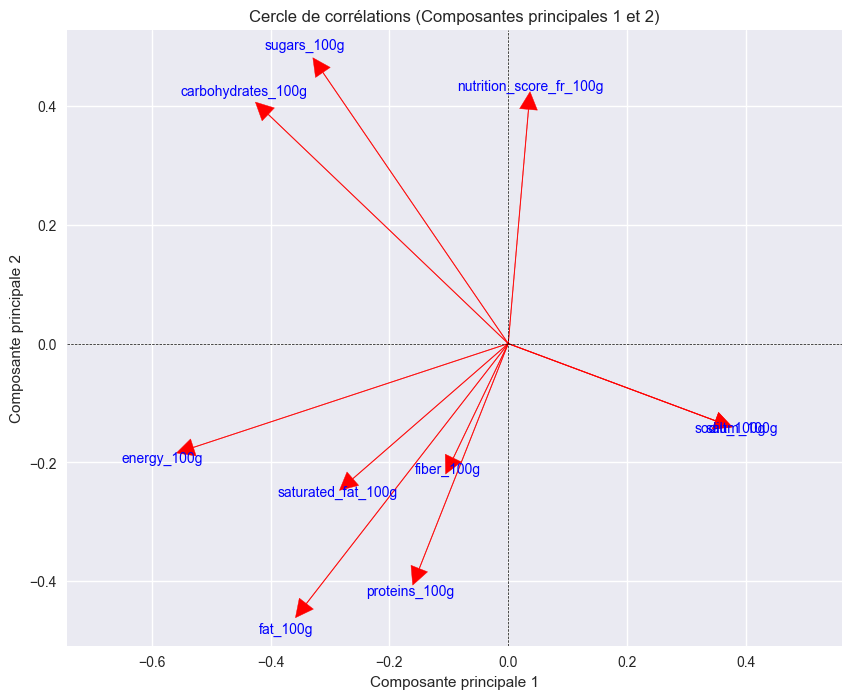

In [22]:
# Calcul des composantes principales et des contributions des variables
components = pca.components_[:2]  # Les deux premières composantes principales
variable_names = numeric_columns

# Cercle de corrélations
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

# Ajout des éléments graphiques
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 1 et 2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.axis('equal')
plt.show()

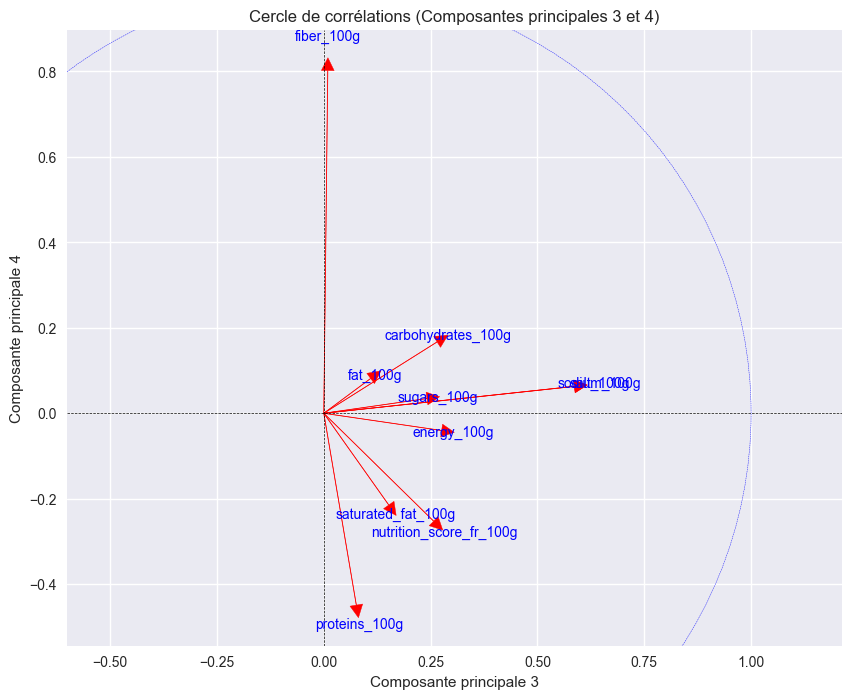

In [26]:
# Cercle de corrélations pour les composantes 3 et 4
plt.figure(figsize=(10, 8))
components_34 = pca.components_[2:4]  # Composantes 3 et 4
for i, (x, y) in enumerate(zip(components_34[0], components_34[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 3 et 4)")
plt.xlabel("Composante principale 3")
plt.ylabel("Composante principale 4")
plt.grid(True)
plt.axis('equal')
plt.show()

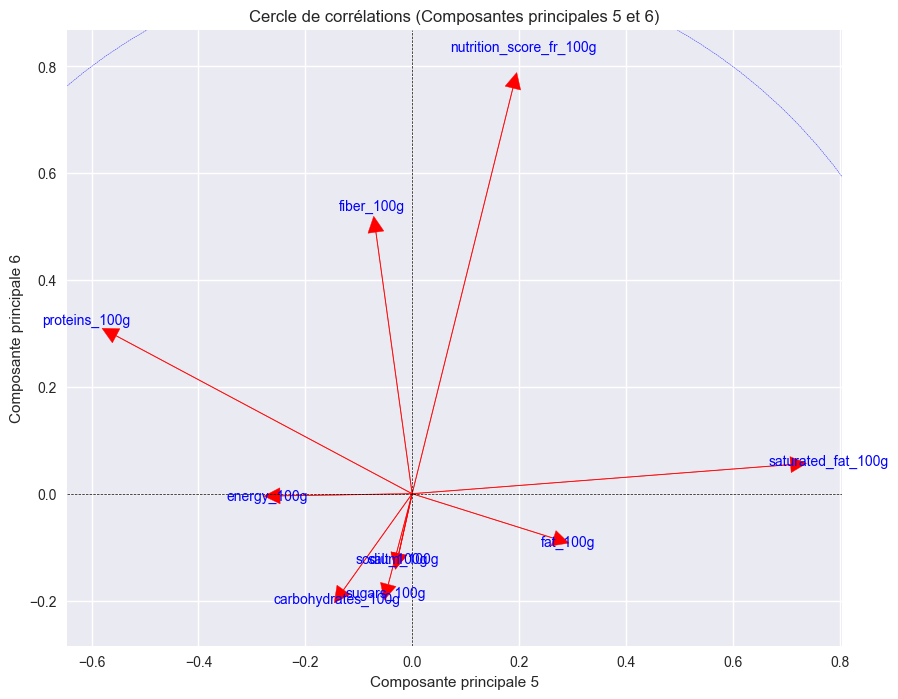

In [27]:
# Cercle de corrélations pour les composantes 5 et 6
plt.figure(figsize=(10, 8))
components_56 = pca.components_[4:6]  # Composantes 5 et 6
for i, (x, y) in enumerate(zip(components_56[0], components_56[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 5 et 6)")
plt.xlabel("Composante principale 5")
plt.ylabel("Composante principale 6")
plt.grid(True)
plt.axis('equal')
plt.show()

## ANOVA - Nutrition grade

In [29]:
# Identification des groupes basés sur `nutrition_grade_fr`
categorical_column = "nutrition_grade_fr"

# Liste des variables numériques à tester
anova_results = {}
for col in numeric_columns:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_sorted = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}
anova_results_sorted

{'nutrition_score_fr_100g': 0.0,
 'fat_100g': 1.4821590987502188e-292,
 'sugars_100g': 5.336818919023917e-166,
 'carbohydrates_100g': 4.645532947694073e-136,
 'energy_100g': 5.709487335239184e-132,
 'proteins_100g': 1.846135659652516e-100,
 'fiber_100g': 9.75196116631406e-98,
 'salt_100g': 3.87259430869726e-55,
 'sodium_100g': 3.872831662501349e-55,
 'saturated_fat_100g': 5.653983250327889e-41}

### Distributions des variables numériques significatives

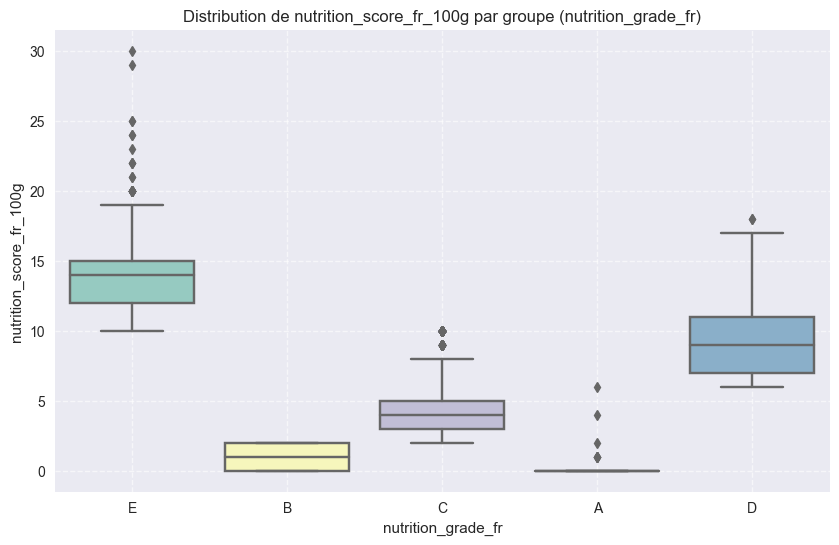

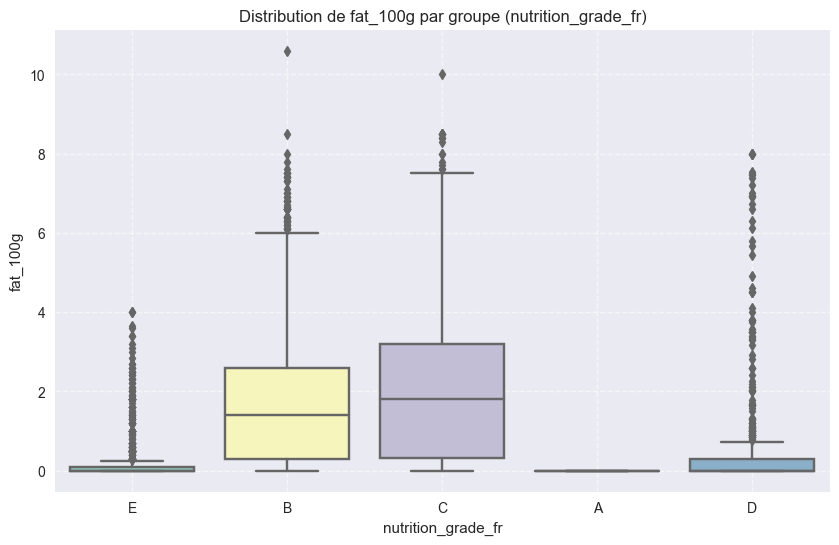

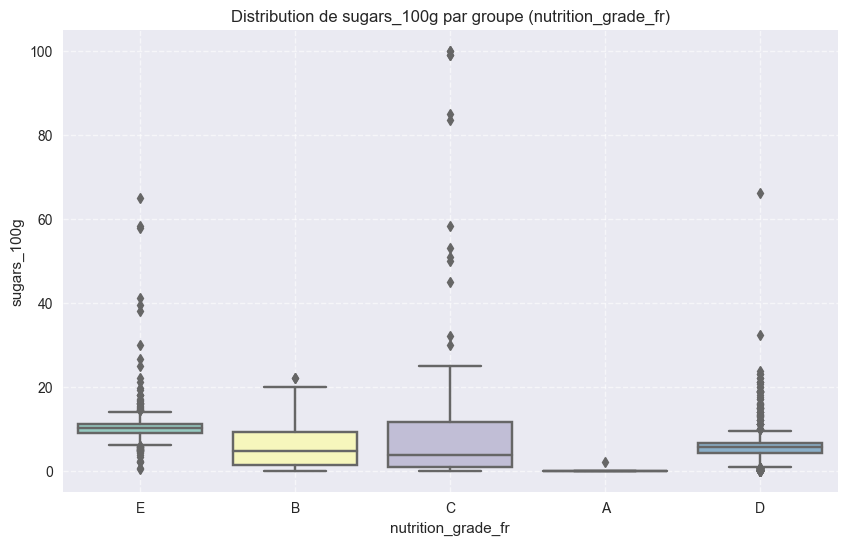

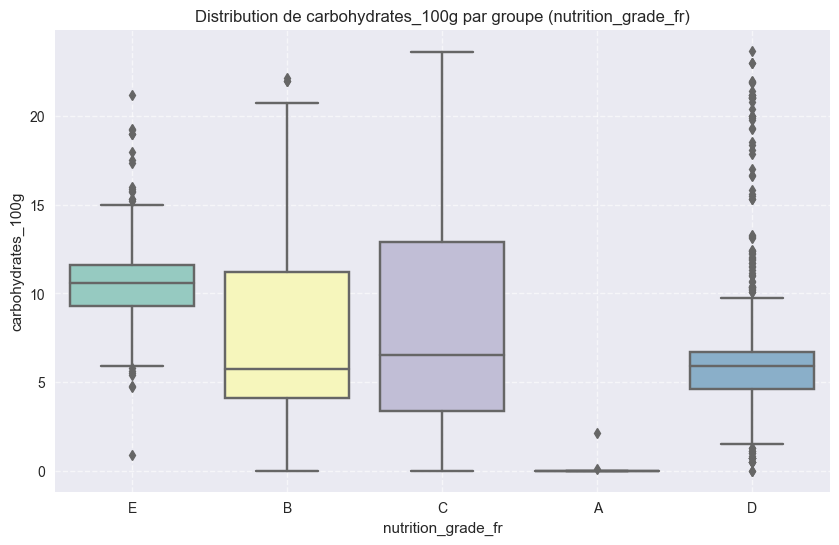

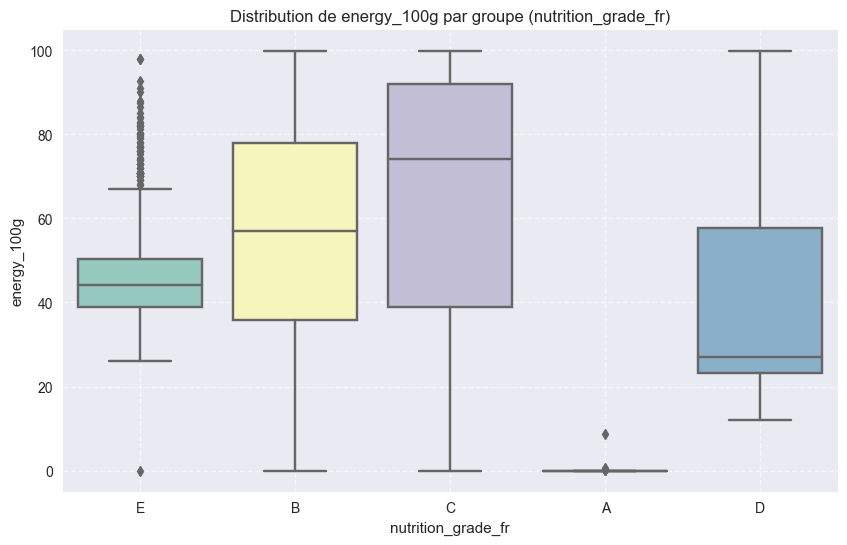

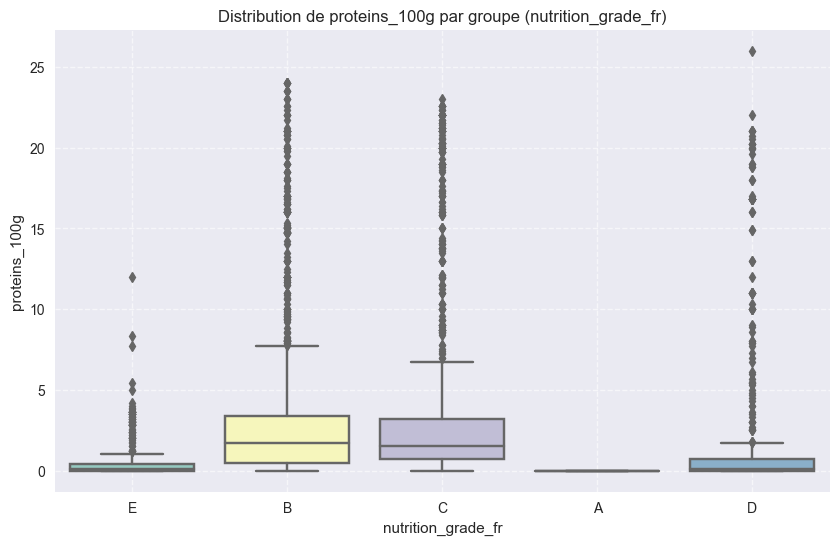

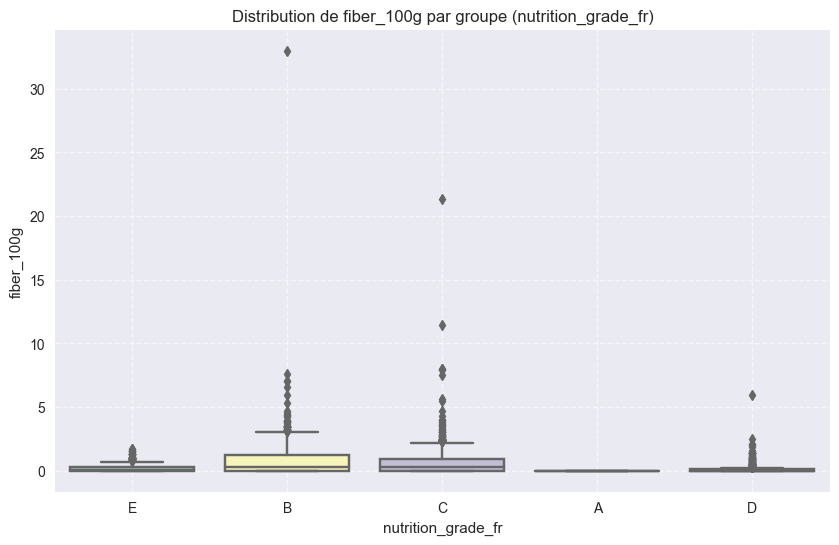

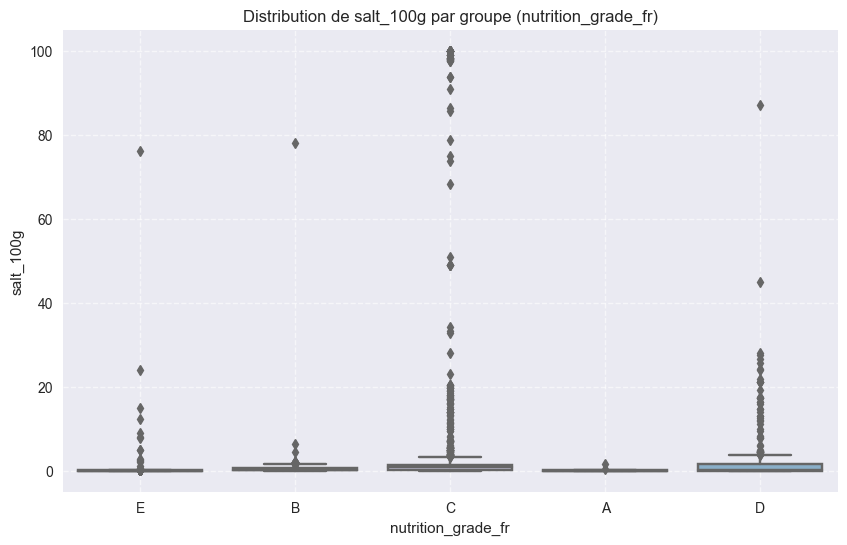

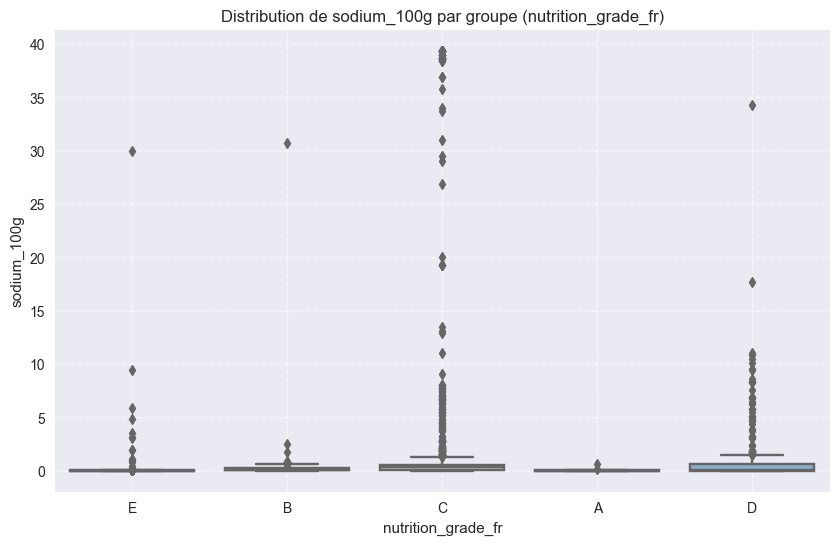

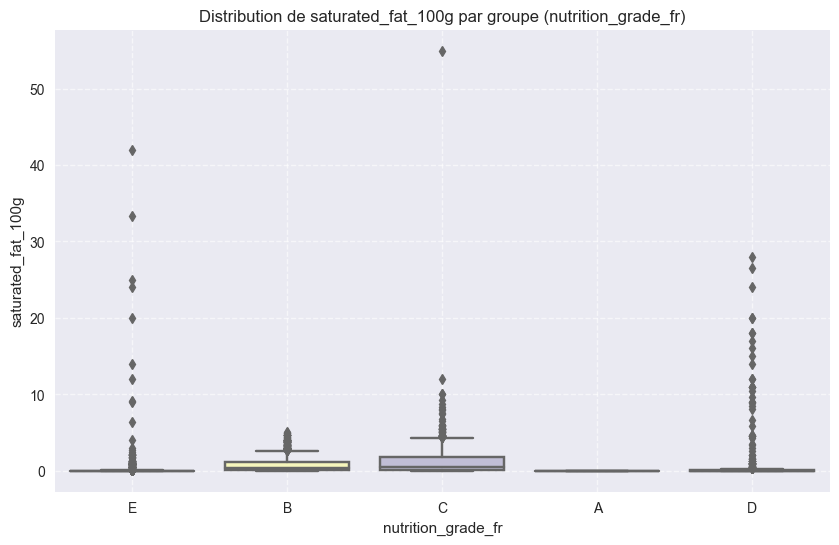

In [30]:
# Visualisation des distributions avec des box plots
for col in anova_results_sorted.keys():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## ANOVA - Pnns groupe 1

In [31]:
# Identification des groupes basés sur `pnns_groups_1`
categorical_column = "pnns_groups_1"

# Test ANOVA pour les groupes définis par `pnns_groups_1`
anova_results_pnns = {}
for col in numeric_columns:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results_pnns[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_pnns_sorted = {k: v for k, v in sorted(anova_results_pnns.items(), key=lambda item: item[1])}
anova_results_pnns_sorted

{'energy_100g': 0.0,
 'fat_100g': 0.0,
 'fiber_100g': 0.0,
 'proteins_100g': 0.0,
 'nutrition_score_fr_100g': 0.0,
 'sugars_100g': 8.057577559623529e-275,
 'carbohydrates_100g': 7.295472727855796e-212,
 'saturated_fat_100g': 5.9374451050092365e-149,
 'salt_100g': 8.886537455539649e-29,
 'sodium_100g': 8.887973026035047e-29}

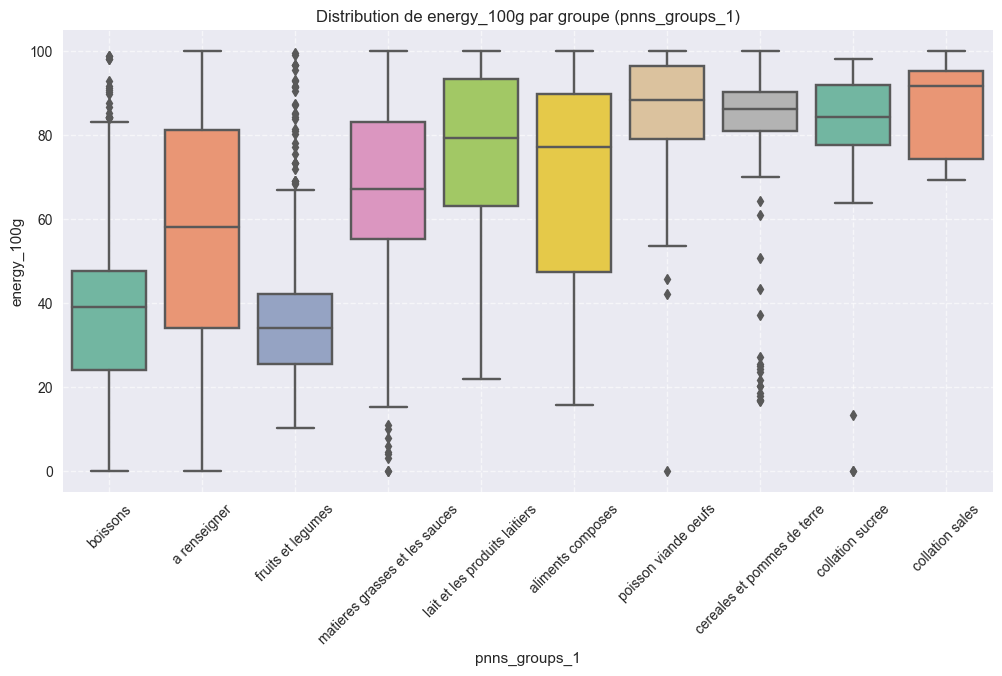

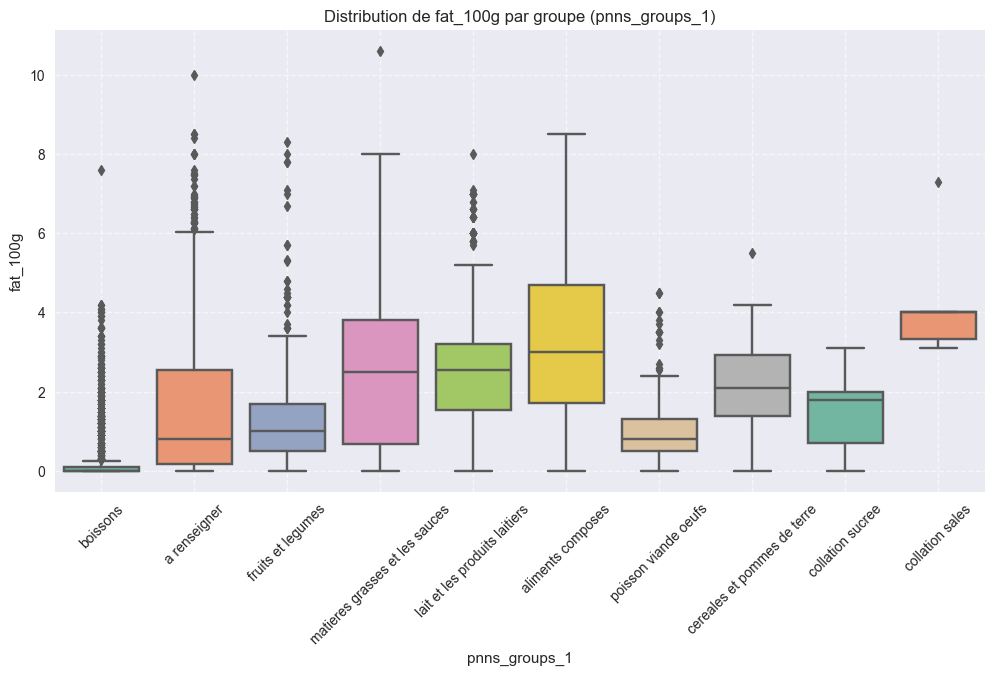

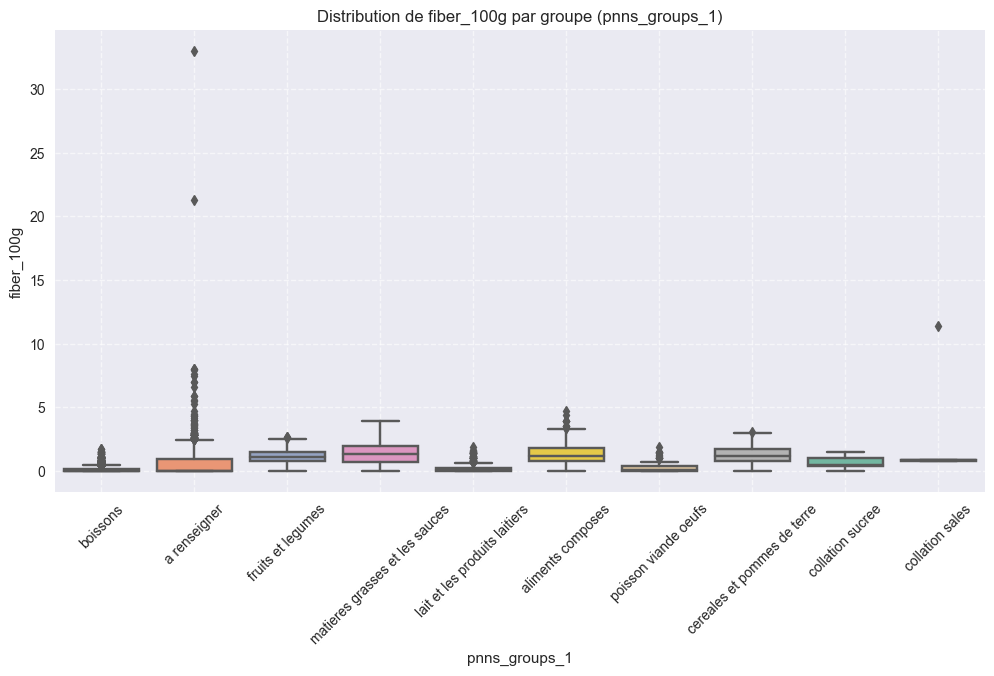

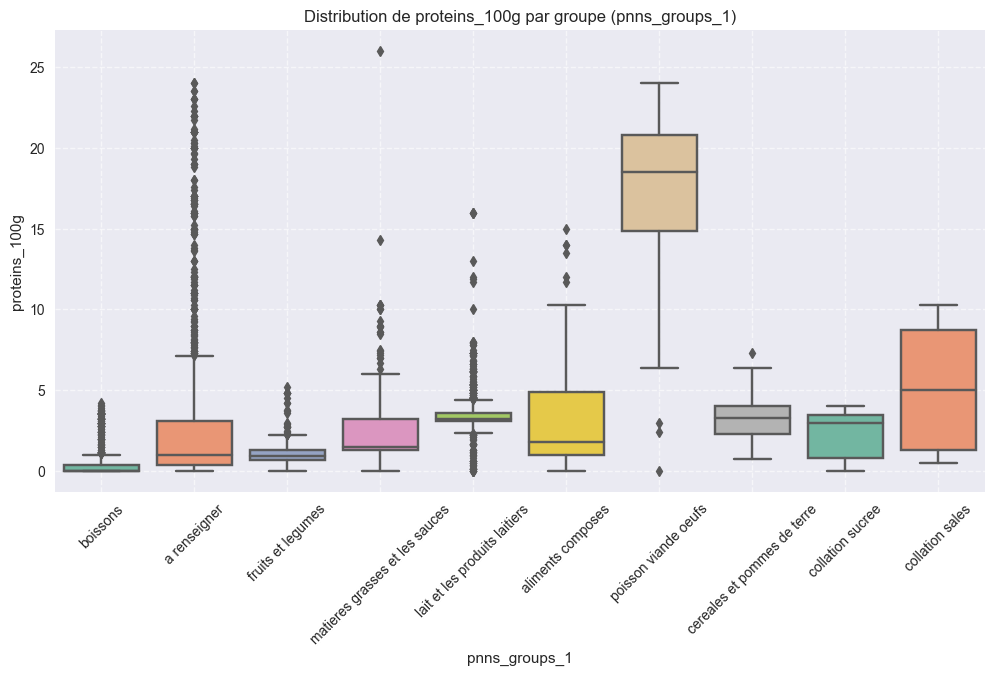

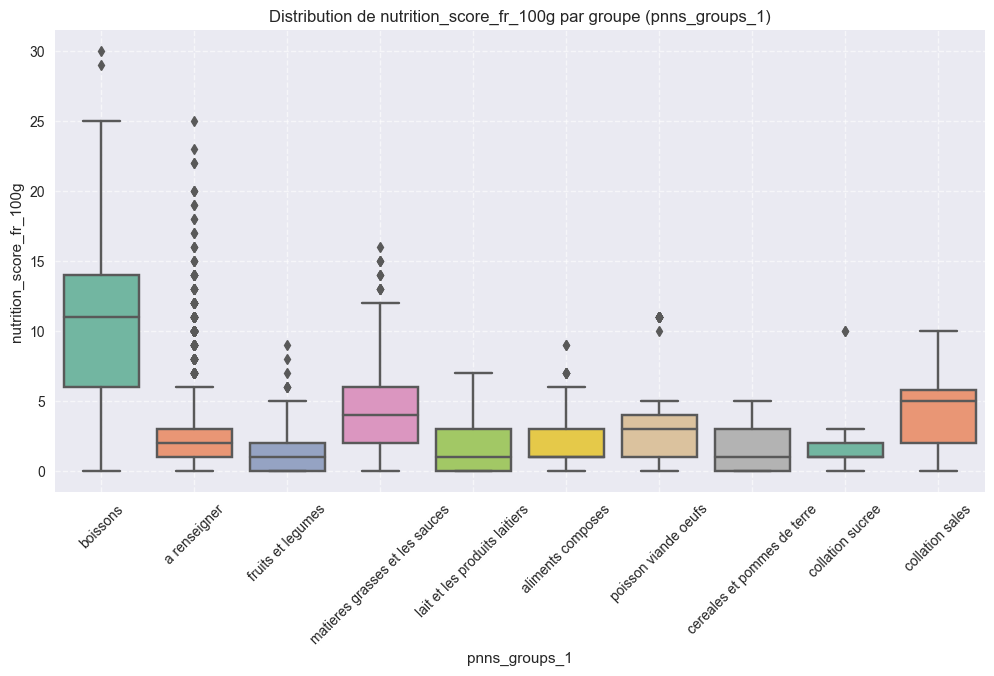

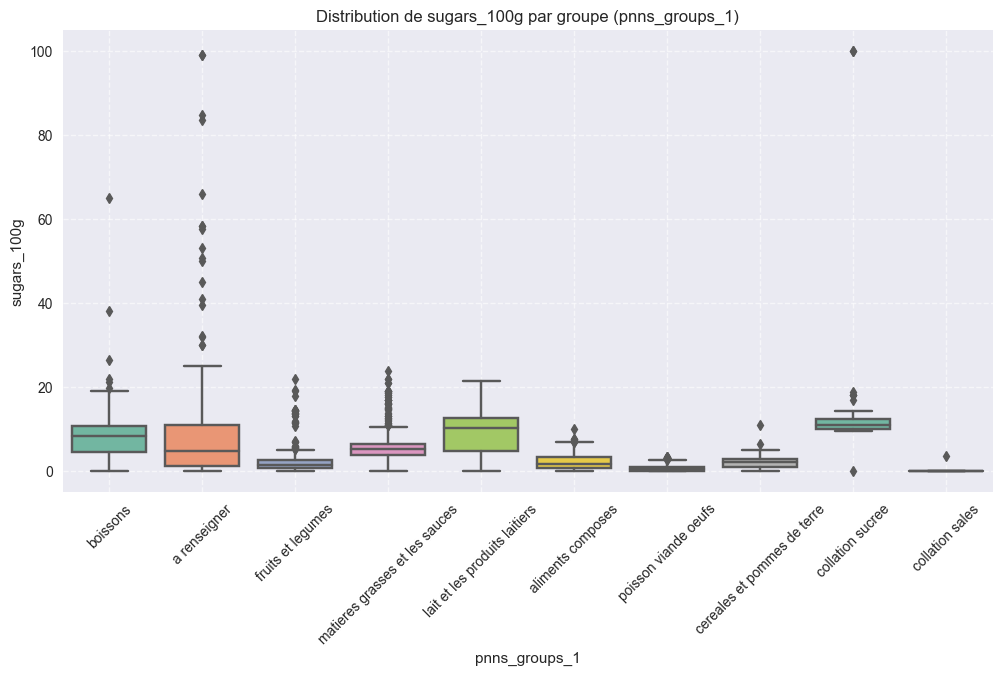

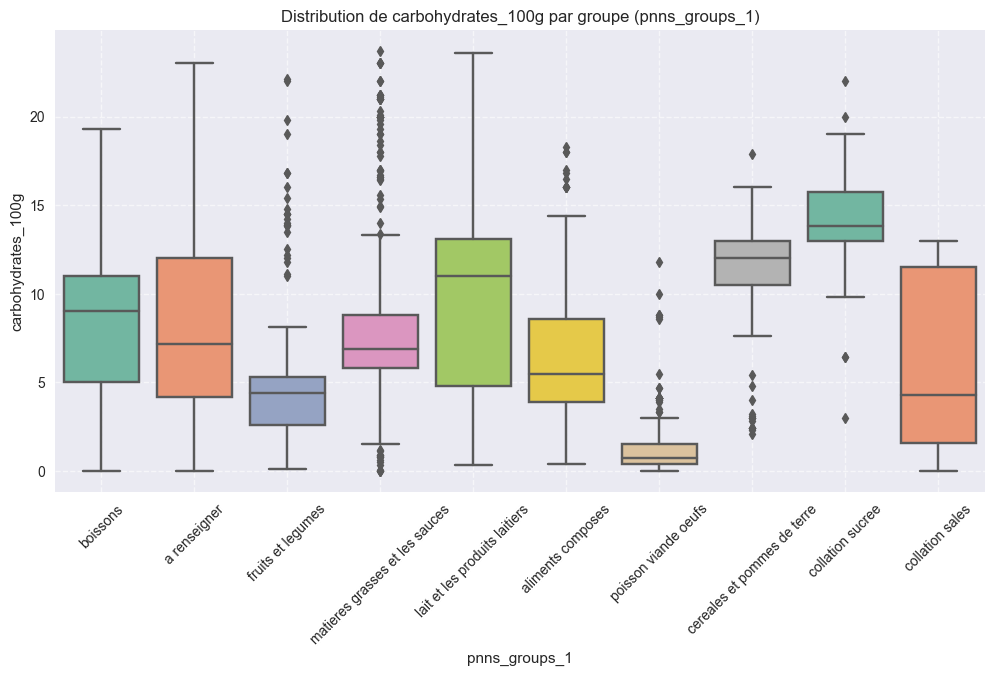

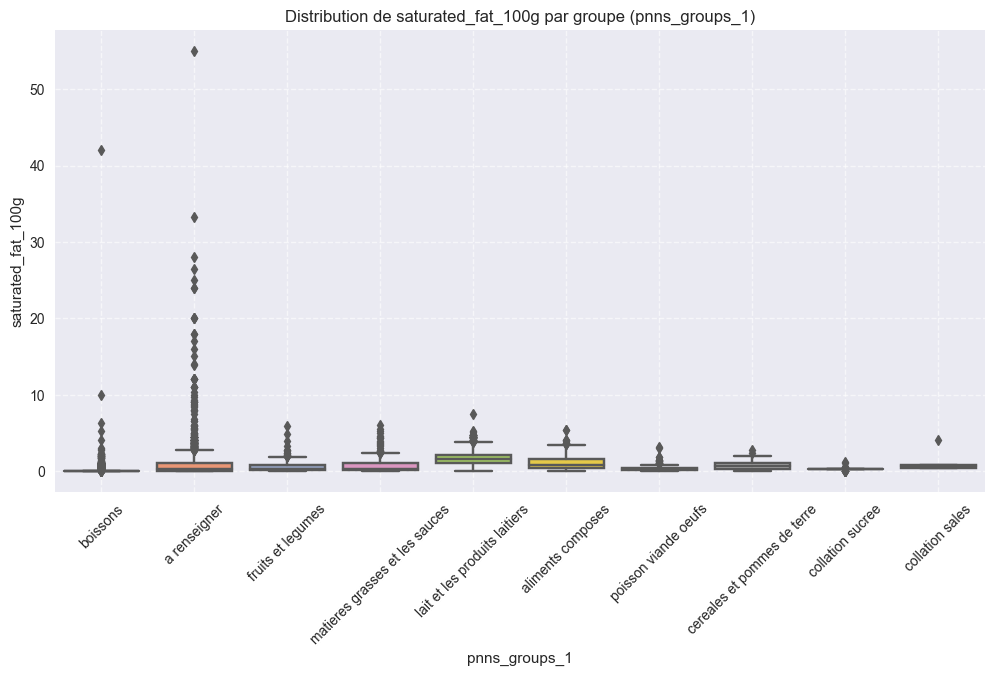

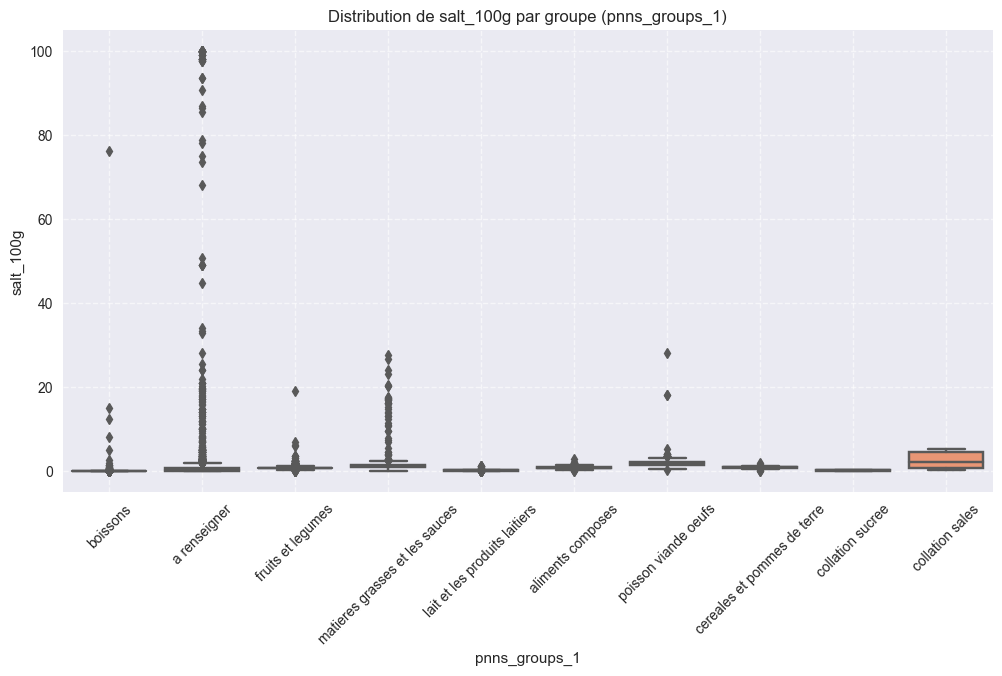

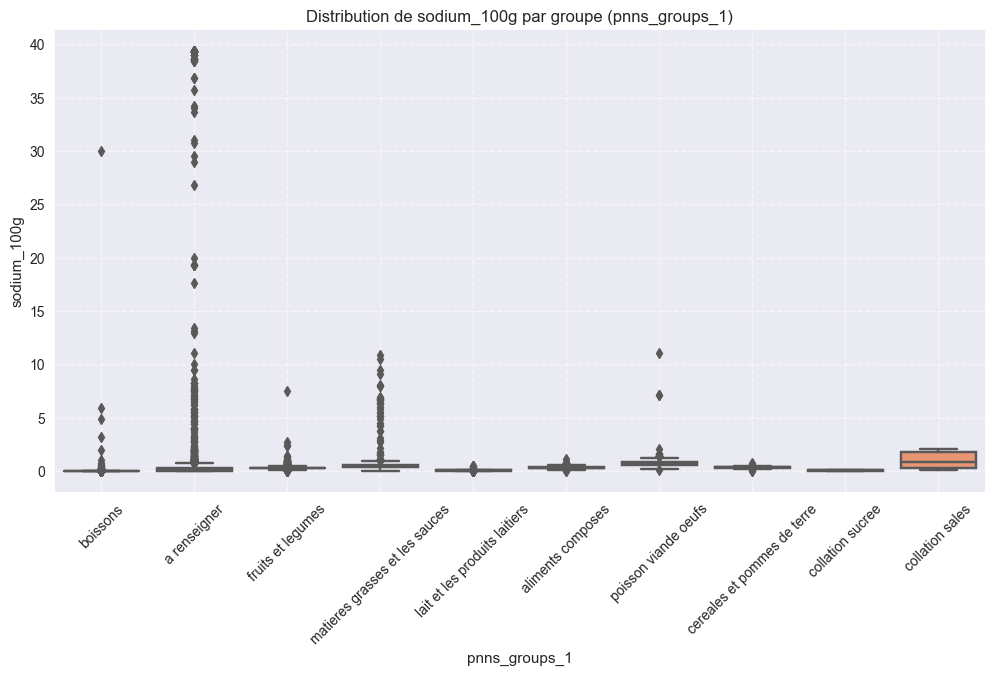

In [32]:
# Visualisation des distributions avec des box plots pour `pnns_groups_1`
for col in anova_results_pnns_sorted.keys():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()